#        Proyecto Final
# Tema: Mantenimiento Predictivo


### Nombres:
##### - Shirley Tenorio Oblitas
##### - Víctor Hugo Achocalla Romero


In [721]:
%matplotlib inline

In [722]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import scale
# libreria para separar datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
# Permite estandarizar las caracteristicas
from sklearn.preprocessing import StandardScaler
# importamos el modelo de LogisticRegression
from sklearn.linear_model import LogisticRegression
# importamos el modelo de SVC
from sklearn.svm import SVC
# importamos el modelo de DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# importamos el modelo de RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# importamos el modelo de KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# importamos la matriz de confusion
from sklearn.metrics import confusion_matrix
# importando clasificacion de reportes
from sklearn.metrics import classification_report
# importando oversampling SMOTE
from imblearn.over_sampling import SMOTE

In [723]:
sns.set()

## 1. Preparación de los datos

#### 1.1. Cargado de datos CSV

In [724]:
dataset = pd.read_csv("predictive_maintenance.csv")
dataset.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


Cambiando los nombres de las columnas a valores más entendibles y manejables

In [725]:
dataset.columns = ['id','id_producto','tipo','temperatura_aire','temperatura_proceso','velocidad_rotacion','torque','desgaste','objetivo','tipo_fallo']
dataset.head(2)

,id,id_producto,tipo,temperatura_aire,temperatura_proceso,velocidad_rotacion,torque,desgaste,objetivo,tipo_fallo
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure


#### 1.2. Buscando valores nulos en el dataset

In [726]:
dataset.isna().sum()

id                     0
id_producto            0
tipo                   0
temperatura_aire       0
temperatura_proceso    0
velocidad_rotacion     0
torque                 0
desgaste               0
objetivo               0
tipo_fallo             0
dtype: int64

In [727]:
dataset.dropna()

,id,id_producto,tipo,temperatura_aire,temperatura_proceso,velocidad_rotacion,torque,desgaste,objetivo,tipo_fallo
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


Después de filtrar todos los valores nulos y sumarlos por cada columna podemos determinar que no existen valores nulos, pasando a los siguientes pasos.

#### 1.3. Obteniendo información del dataset

In [728]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   id_producto          10000 non-null  object 
 2   tipo                 10000 non-null  object 
 3   temperatura_aire     10000 non-null  float64
 4   temperatura_proceso  10000 non-null  float64
 5   velocidad_rotacion   10000 non-null  int64  
 6   torque               10000 non-null  float64
 7   desgaste             10000 non-null  int64  
 8   objetivo             10000 non-null  int64  
 9   tipo_fallo           10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [729]:
dataset.describe()

,id,temperatura_aire,temperatura_proceso,velocidad_rotacion,torque,desgaste,objetivo
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


Como se puede observar las columnas de tipo Object: id_producto (identificador único de producto), tipo (calidad H "high o alta", M "medium o media" y L "low o baja"), tipo_fallo (varios tipos de fallo). debemos analizar todas estas columnas.

#### 1.4. Analizando columnas (id_producto, tipo, tipo_fallo)

##### 1.4.1. Analizando columna 'id'

In [730]:
dataset['id'].value_counts()

2049    1
8865    1
6806    1
4759    1
8857    1
       ..
9526    1
5432    1
7481    1
1338    1
2047    1
Name: id, Length: 10000, dtype: int64

Podemos observar que todas las filas de esta columnas son únicas, por lo tanto simplemente se considera identificador de fila y esta información no es importante para la ser utilizado en modelado.

##### 1.4.2. Analizando columna 'id_producto'

In [731]:
dataset['id_producto'].value_counts()

L54936    1
L56860    1
L50709    1
L56873    1
L56834    1
         ..
L53941    1
M19058    1
M17563    1
M22620    1
L54218    1
Name: id_producto, Length: 10000, dtype: int64

Podemos observar que todas las filas de esta columna son únicas, por lo tanto, simplemente se considera identificador de producto único y esta información no es importante para la ser utilizado en modelado.

##### 1.4.3. Analizando columna 'tipo'

In [732]:
dataset['tipo'].value_counts()

L    6000
M    2997
H    1003
Name: tipo, dtype: int64

In [733]:
(dataset['tipo'].value_counts()/dataset.shape[0]*100).round(2)

L    60.00
M    29.97
H    10.03
Name: tipo, dtype: float64

<AxesSubplot:xlabel='tipo', ylabel='count'>

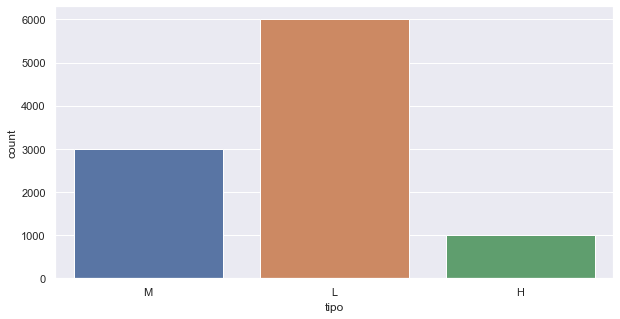

In [734]:
plt.figure(figsize=(10,5))
sns.countplot(data=dataset,x='tipo')

Esta columna tiene tres diferentes datos nominales que se deben categorizar. siendo 60% de los productos de calidad baja 'L', 29.97% productos de calidad media y 10.03% productos de calidad alta.

##### 1.4.4. Analizando columna 'tipo_fallo'

In [735]:
dataset['tipo_fallo'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: tipo_fallo, dtype: int64

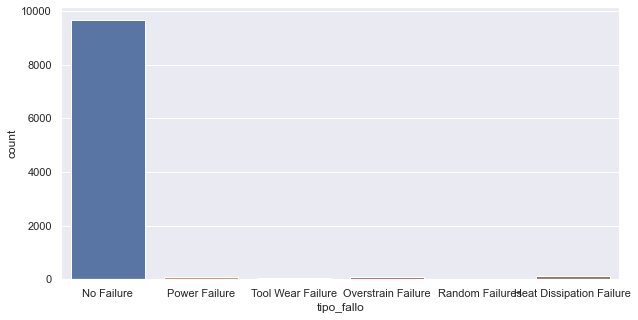

In [736]:
plt.figure(figsize=(10,5))
axis = sns.countplot(data=dataset ,x='tipo_fallo')

Esta columna tiene diferentes datos nominales que se deben categorizar.
Nota importante: El tipo de fallo no contribuye al 'objetivo' debido a que se determina posterior al fallo.

#### 1.5. Analizando la columna 'Objetivo'

In [737]:
dataset['objetivo'].value_counts()

0    9661
1     339
Name: objetivo, dtype: int64

In [738]:
(dataset['objetivo'].value_counts()/dataset.shape[0]*100).round(2)

0    96.61
1     3.39
Name: objetivo, dtype: float64

Del total de registro 96.51% de equipos no fallaron y 3.39% fallaron.

#### 1.6. Convertir la columna categórica 'tipo' en columnas manejables numéricamente

In [739]:
dataset = pd.get_dummies(dataset , columns=['tipo'])
dataset.head(3)

,id,id_producto,temperatura_aire,temperatura_proceso,velocidad_rotacion,torque,desgaste,objetivo,tipo_fallo,tipo_H,tipo_L,tipo_M
0,1,M14860,298.1,308.6,1551,42.8,0,0,No Failure,0,0,1
1,2,L47181,298.2,308.7,1408,46.3,3,0,No Failure,0,1,0
2,3,L47182,298.1,308.5,1498,49.4,5,0,No Failure,0,1,0


Se convirtió la columna categórica 'tipo' en columnas ficticias para cada categoría ('tipo_H','tipo_M','tipo_L').

#### 1.7. Eliminando las columnas que no son relevantes para determinar el objetivo de fallo

observamos la correracion entre columnas

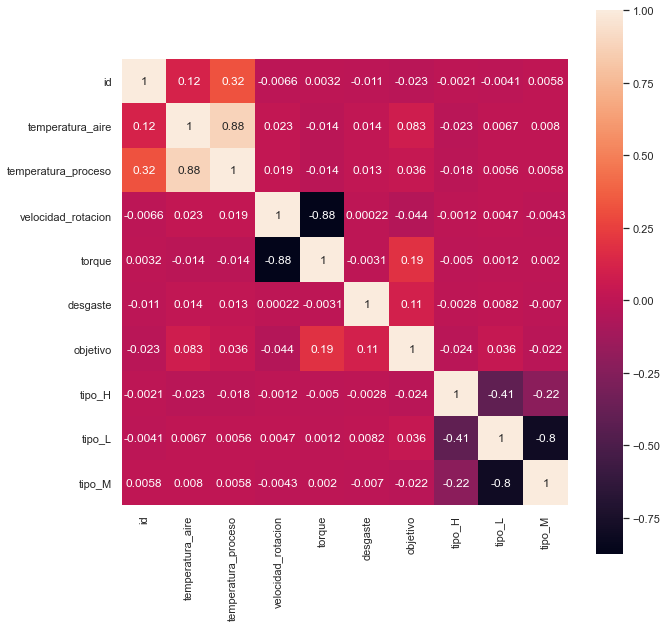

In [740]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(dataset.corr(), annot = True, square = True);

In [741]:
datasetFinal = dataset.copy()
columnasEliminar=['id','id_producto','tipo_fallo']
datasetFinal.drop(columns=columnasEliminar ,axis=1, inplace=True)
datasetFinal.head(3)

,temperatura_aire,temperatura_proceso,velocidad_rotacion,torque,desgaste,objetivo,tipo_H,tipo_L,tipo_M
0,298.1,308.6,1551,42.8,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0


Se eliminaron las columnas 'id','id_producto','tipo_fallo' que no son relevantes para determinar el 'fallo'.

<ipython-input-742-2d7c429873ae>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  datasetFinal.hist(ax=ax)


array([[<AxesSubplot:title={'center':'temperatura_aire'}>,
        <AxesSubplot:title={'center':'temperatura_proceso'}>,
        <AxesSubplot:title={'center':'velocidad_rotacion'}>],
       [<AxesSubplot:title={'center':'torque'}>,
        <AxesSubplot:title={'center':'desgaste'}>,
        <AxesSubplot:title={'center':'objetivo'}>],
       [<AxesSubplot:title={'center':'tipo_H'}>,
        <AxesSubplot:title={'center':'tipo_L'}>,
        <AxesSubplot:title={'center':'tipo_M'}>]], dtype=object)

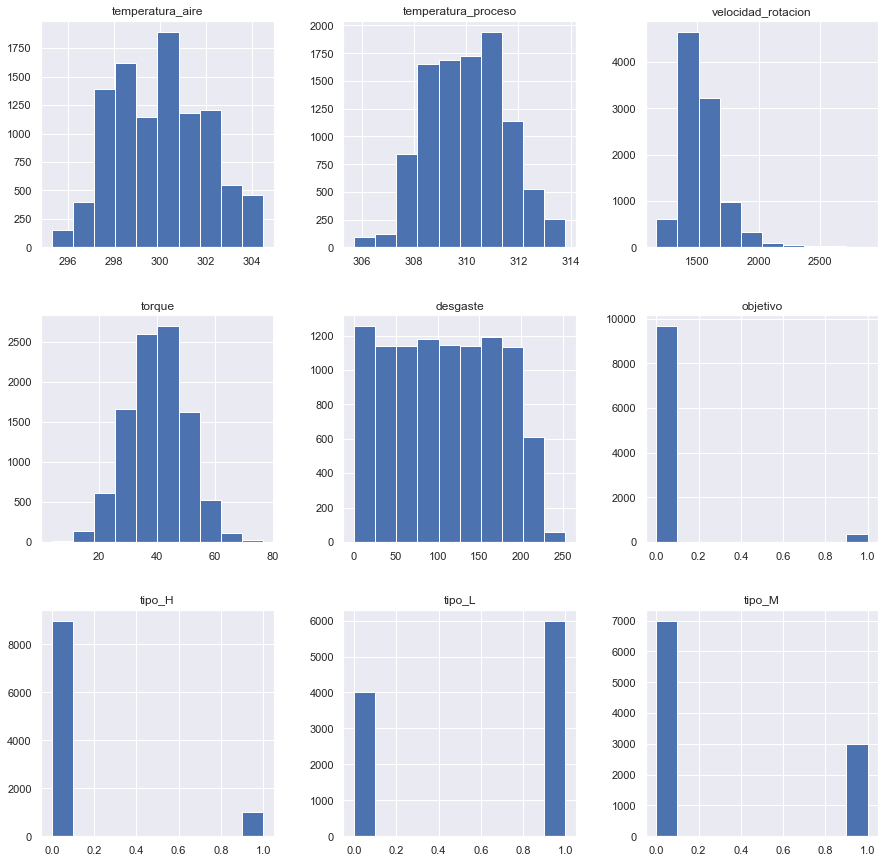

In [742]:
fig = plt.figure(figsize=(15,15))
ax = plt.gca()
datasetFinal.hist(ax=ax)

Observamos mediante un histograma la distribución de los datos y podemos observar que las columnas temperatura_aire, temperatura_proceso, torque siguen una distribución normal. Sin embargo el desgaste no sigue una distribución normal y debido a la mezcla de las tres categorías no proporciona mucha información. Por último las columnas 'objetivo', 'tipo_H', 'tipo_M', 'tipo_L' son variables categóricas.

Utilizando una gráfica de Boxplot para identificar los valores atípicos (outliers).

<AxesSubplot:>

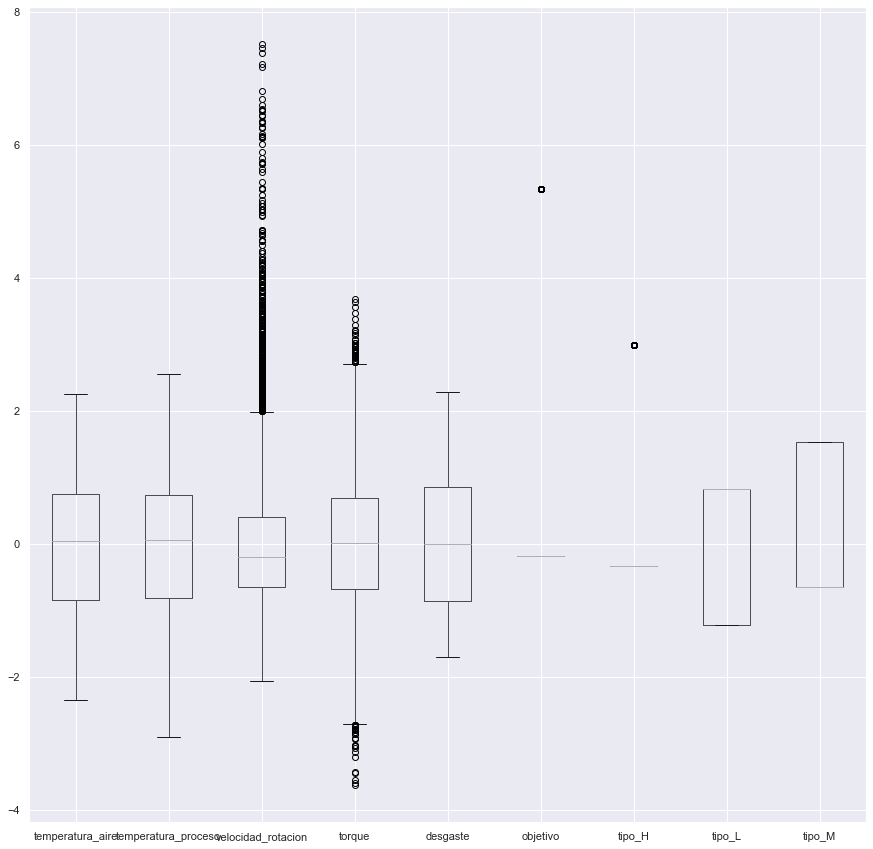

In [743]:
fig = plt.figure(figsize=(15,15))
ax =plt.gca()
pd.DataFrame( scale(datasetFinal) ,columns= datasetFinal.columns ).boxplot(ax=ax,whis=1.5)

Podemos observar que las columnas 'velocidad_rotacion', 'torque' tienen valores atípicos (outliers) y las Columnas 'objetivo', 'tipo_H', 'tipo_M', 'tipo_L' son variables categóricas.

Procedemos a eliminar los datos atipocos de la columna 'velocidad_rotacion'

In [744]:
q1Vr = datasetFinal['velocidad_rotacion'].quantile(.25)
q3Vr = datasetFinal['velocidad_rotacion'].quantile(.75)
iqrVr = q3Vr - q1Vr
topVr = q3Vr + iqrVr * 1.5
botVr = q1Vr - iqrVr * 1.5
datasetFinalIQR = datasetFinal.copy()
datasetFinalIQR = datasetFinalIQR.drop( datasetFinalIQR[ datasetFinalIQR['velocidad_rotacion']>topVr].index )
datasetFinalIQR = datasetFinalIQR.drop( datasetFinalIQR[ datasetFinalIQR['velocidad_rotacion']<botVr].index )
datasetFinalIQR

,temperatura_aire,temperatura_proceso,velocidad_rotacion,torque,desgaste,objetivo,tipo_H,tipo_L,tipo_M
0,298.1,308.6,1551,42.8,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,1,0
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,0,1
9996,298.9,308.4,1632,31.8,17,0,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,0,1
9998,299.0,308.7,1408,48.5,25,0,1,0,0


Procedemos a eliminar los datos atipocos de la columna 'torque'

In [745]:
q1T = datasetFinalIQR['torque'].quantile(.25)
q3T = datasetFinalIQR['torque'].quantile(.75)
iqrT = q3T - q1T
topT = q3T + iqrT * 1.5
botT = q1T - iqrT * 1.5
datasetFinalIQR = datasetFinalIQR.drop( datasetFinalIQR[ datasetFinalIQR['torque']>topT].index )
datasetFinalIQR = datasetFinalIQR.drop( datasetFinalIQR[ datasetFinalIQR['torque']<botT].index )
datasetFinal = datasetFinalIQR.copy()
datasetFinal

,temperatura_aire,temperatura_proceso,velocidad_rotacion,torque,desgaste,objetivo,tipo_H,tipo_L,tipo_M
0,298.1,308.6,1551,42.8,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,1,0
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,0,1
9996,298.9,308.4,1632,31.8,17,0,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,0,1
9998,299.0,308.7,1408,48.5,25,0,1,0,0


Volvemos a graficar el boxplot una vez eliminado los valores atípicos

<AxesSubplot:>

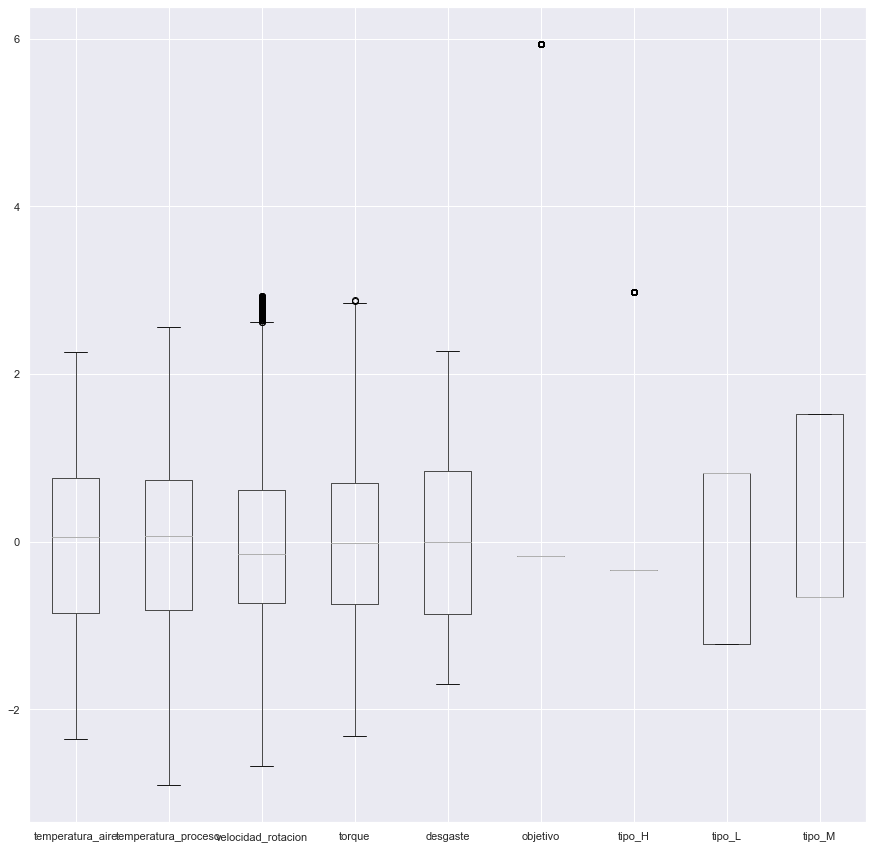

In [746]:
fig = plt.figure(figsize=(15,15))
ax =plt.gca()
pd.DataFrame( scale(datasetFinal) ,columns= datasetFinal.columns ).boxplot(ax=ax,whis=1.5)

#### 1.8. Especificando datos para Entrenamiento y Pruebas

In [747]:
datasetFinal_X = datasetFinal.drop(['objetivo'],axis=1)
datasetFinal_Y = datasetFinal['objetivo']
display(datasetFinal_X.shape,datasetFinal_Y.shape)

(9535, 8)

(9535,)

In [748]:
datasetFinal_Y.value_counts()

0    9272
1     263
Name: objetivo, dtype: int64

### 2. Entrenamiento con un Modelo de Machine Learning

División de los datos 80% para entrenamiento y 20% para pruebas.

In [749]:
X_train, X_test, Y_train, Y_test = train_test_split(datasetFinal_X, datasetFinal_Y, test_size = 0.2, random_state = 42)
#X_train, X_test, Y_train, Y_test = train_test_split(datasetFinal_X, datasetFinal_Y, test_size = 0.2)
print("Cantidad de datos para entrenamiento")
display(X_train.shape,Y_train.shape)
print("Cantidad de datos para pruebas")
display(X_test.shape,Y_test.shape)

Cantidad de datos para entrenamiento


(7628, 8)

(7628,)

Cantidad de datos para pruebas


(1907, 8)

(1907,)

Estandarizamos los datos

In [750]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Creación del modelo machine learning

In [751]:
#modelo = KNeighborsClassifier(n_neighbors=1)
#              precision    recall  f1-score   support
#           0       0.98      0.99      0.99      1848
#           1       0.64      0.36      0.46        59

modelo = KNeighborsClassifier(n_neighbors=1,metric='manhattan') #p=1,2
#              precision    recall  f1-score   support
#           0       0.98      0.99      0.99      1848
#           1       0.58      0.37      0.45        59

#modelo = KNeighborsClassifier(n_neighbors=2,metric='euclidean',algorithm='kd_tree', weights='distance')
#              precision    recall  f1-score   support
#           0       0.98      0.99      0.99      1848
#           1       0.64      0.36      0.46        59

Entrenamiento del modelo

In [752]:
modelo.fit(X_train, Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

Calculando la presición de modelo, utilizando los datos de prueba (X_test, Y_test)

In [753]:
precision = modelo.score(X_test,Y_test)
print("PRECISION MODELO: ", precision)

PRECISION MODELO:  0.9722076560041951


Calculamos Y_pred (son los valores objetivo que predice el modelo)

In [754]:
Y_pred = modelo.predict(X_test)

Mediante una matriz de confusión verificamos la precision de los datos predecidos Y_pred vs los datos esperados Y_test 

<AxesSubplot:>

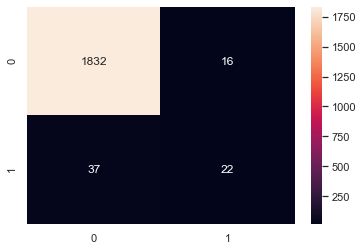

In [755]:
matriz_confusion = confusion_matrix(Y_test, Y_pred)
sns.heatmap(matriz_confusion, annot = True, fmt='g')

Analizamos los resultados nos lanza el 'classification_report', entre los más importantes se encuentran el Recall

In [756]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1848
           1       0.58      0.37      0.45        59

    accuracy                           0.97      1907
   macro avg       0.78      0.68      0.72      1907
weighted avg       0.97      0.97      0.97      1907

